In [1]:
import os
dir_path = "/Users/minhyeong-gyu/Documents/GitHub/QAOA_realestate/Python"
os.chdir(dir_path)
import sys
module_path = "/Users/minhyeong-gyu/Documents/GitHub/QAOA_realestate/Python"
if module_path not in sys.path:
    sys.path.append(module_path)

from optimizer import optimizer as opt
from optimizer import basefunctions as bf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from qiskit import Aer
import easydict
from dwave.system import LeapHybridCQMSampler
from IPython.display import clear_output
%matplotlib inline

In [2]:
beta= {'종로구': 0.7043230350406724,
 '중구': 0.7013707352553286,
 '용산구': 0.6227240385741704,
 '성동구': 0.6774652574577301,
 '광진구': 0.7774304796156825,
 '동대문구': 0.7312901961288749,
 '중랑구': 0.8495435178569114,
 '성북구': 0.7353748267964536,
 '강북구': 0.5590302816841793,
 '도봉구': 0.6104941055445325,
 '노원구': 0.5814943813430039,
 '은평구': 0.6848609382154561,
 '서대문구': 0.8959956736444682,
 '마포구': 0.7980492464899224,
 '양천구': 0.6786819907017784,
 '강서구': 0.7174780572351959,
 '구로구': 0.677190182997848,
 '금천구': 0.7106326446994807,
 '영등포구': 0.7866140518456497,
 '동작구': 0.7137865551481725,
 '관악구': 0.8001399119261533,
 '서초구': 0.7802900931734599,
 '강남구': 0.6746651464105473,
 '송파구': 0.705094842287758,
 '강동구': 0.7919404607562062}

Q = pd.DataFrame([[1.00682001e-05, 8.25395637e-06, 4.39375836e-06, 6.84137795e-06,
        6.46402755e-06, 6.64405292e-06, 5.02962050e-06, 8.43589135e-06,
        8.19468754e-06, 8.88946246e-06, 1.00874159e-05, 1.10857348e-05,
        1.34619620e-05, 8.49167276e-06, 5.95900832e-06, 7.48430311e-06,
        6.93096540e-06, 1.03322631e-05, 9.73130024e-06, 6.49924418e-06,
        6.23553238e-06, 8.45107912e-06, 7.50212758e-06, 7.07619043e-06,
        5.17701993e-06, 7.25435545e-06, 6.91303747e-06, 1.19529178e-05],
       [8.25395637e-06, 1.31586466e-05, 6.51602479e-06, 9.61132426e-06,
        1.00166363e-05, 1.20684154e-05, 9.65049109e-06, 1.31789070e-05,
        1.08553903e-05, 1.42602462e-05, 1.62950868e-05, 1.61407087e-05,
        1.85124607e-05, 1.13814904e-05, 9.66127679e-06, 1.17848706e-05,
        1.43198471e-05, 1.41318133e-05, 1.50251914e-05, 1.04266390e-05,
        1.23613655e-05, 1.36480015e-05, 1.16293550e-05, 1.16364711e-05,
        1.07072094e-05, 1.30852945e-05, 1.09529555e-05, 1.12958304e-05],
       [4.39375836e-06, 6.51602479e-06, 6.75335317e-06, 4.95338394e-06,
        5.79512733e-06, 6.15382130e-06, 4.78051493e-06, 5.91733358e-06,
        6.13536996e-06, 6.96774825e-06, 7.99138828e-06, 7.88267258e-06,
        8.66507488e-06, 6.65147763e-06, 4.69599671e-06, 5.27837742e-06,
        6.50486767e-06, 7.34871259e-06, 7.46058308e-06, 4.89122893e-06,
        6.18369237e-06, 6.17874513e-06, 5.98362107e-06, 6.42451844e-06,
        5.44738058e-06, 6.13049084e-06, 5.85442160e-06, 5.47921733e-06],
       [6.84137795e-06, 9.61132426e-06, 4.95338394e-06, 1.04024969e-05,
        7.63734651e-06, 8.28981835e-06, 6.82100598e-06, 9.76505921e-06,
        7.94749803e-06, 1.04736745e-05, 1.17206838e-05, 1.15634381e-05,
        1.37990877e-05, 9.27769809e-06, 7.16492449e-06, 8.92460873e-06,
        1.00095975e-05, 1.04793145e-05, 1.10781895e-05, 7.09151212e-06,
        9.09957654e-06, 1.07583568e-05, 9.13688841e-06, 7.86801338e-06,
        7.36828056e-06, 8.81319175e-06, 8.29555263e-06, 8.85957365e-06],
       [6.46402755e-06, 1.00166363e-05, 5.79512733e-06, 7.63734651e-06,
        1.38765476e-05, 9.43751779e-06, 7.42838869e-06, 1.05269054e-05,
        8.11552790e-06, 1.01591879e-05, 1.04482265e-05, 1.07740458e-05,
        1.11886641e-05, 8.79593560e-06, 7.31633427e-06, 9.23110341e-06,
        1.04736141e-05, 1.16733598e-05, 1.05930695e-05, 6.41834774e-06,
        9.86690803e-06, 1.08628494e-05, 9.21827091e-06, 1.03131618e-05,
        9.62164108e-06, 9.60299599e-06, 9.65811368e-06, 8.76290662e-06],
       [6.64405292e-06, 1.20684154e-05, 6.15382130e-06, 8.28981835e-06,
        9.43751779e-06, 1.60507826e-05, 1.02879246e-05, 1.20934600e-05,
        9.43391209e-06, 1.22905669e-05, 1.33334053e-05, 1.37527606e-05,
        1.57888320e-05, 1.01392405e-05, 8.55181217e-06, 1.04829643e-05,
        1.26560729e-05, 1.18289022e-05, 1.24165787e-05, 8.64940674e-06,
        1.05987688e-05, 1.22163341e-05, 9.20841519e-06, 1.08957657e-05,
        1.10026541e-05, 1.37322537e-05, 1.10871929e-05, 9.35414490e-06],
       [5.02962050e-06, 9.65049109e-06, 4.78051493e-06, 6.82100598e-06,
        7.42838869e-06, 1.02879246e-05, 1.06665461e-05, 9.13999579e-06,
        7.29567605e-06, 1.02415634e-05, 1.12589287e-05, 1.00670804e-05,
        1.22622821e-05, 7.50128720e-06, 6.98042065e-06, 8.22107528e-06,
        1.12833881e-05, 9.80959641e-06, 9.71501858e-06, 8.34050288e-06,
        8.88614516e-06, 8.59284436e-06, 7.67356555e-06, 8.65129990e-06,
        9.49512911e-06, 1.16254348e-05, 8.36021585e-06, 7.20942034e-06],
       [8.43589135e-06, 1.31789070e-05, 5.91733358e-06, 9.76505921e-06,
        1.05269054e-05, 1.20934600e-05, 9.13999579e-06, 1.59496560e-05,
        1.10098791e-05, 1.39890344e-05, 1.63400608e-05, 1.63113214e-05,
        1.87921937e-05, 1.13604959e-05, 9.91236525e-06, 1.23515822e-05,
        1.38949568e-05, 1.41706779e-05, 1.48509144e-05, 1.01183766e-05,
        1.22242606e-05, 1.46032465e-05, 1.19800196e-05, 1.15415956e-05,
        9.62964157e-06, 1.21916195e-05, 1.14305976e-05, 1.18044021e-05],
       [8.19468754e-06, 1.08553903e-05, 6.13536996e-06, 7.94749803e-06,
        8.11552790e-06, 9.43391209e-06, 7.29567605e-06, 1.10098791e-05,
        1.18081155e-05, 1.17600095e-05, 1.41767718e-05, 1.49472821e-05,
        1.62072335e-05, 1.03560642e-05, 7.91826940e-06, 8.85960132e-06,
        1.02908934e-05, 1.23212631e-05, 1.31104692e-05, 8.43054436e-06,
        9.53496050e-06, 1.06010036e-05, 9.25520596e-06, 9.40819055e-06,
        7.79011160e-06, 9.98169502e-06, 8.97364898e-06, 1.06957825e-05],
       [8.88946246e-06, 1.42602462e-05, 6.96774825e-06, 1.04736745e-05,
        1.01591879e-05, 1.22905669e-05, 1.02415634e-05, 1.39890344e-05,
        1.17600095e-05, 1.78694526e-05, 1.81737909e-05, 1.80039222e-05,
        2.11701155e-05, 1.32885085e-05, 1.09284141e-05, 1.28514024e-05,
        1.49182060e-05, 1.55379853e-05, 1.68462413e-05, 1.15188017e-05,
        1.35489647e-05, 1.48612244e-05, 1.30926596e-05, 1.17052353e-05,
        1.01668804e-05, 1.33413705e-05, 1.10175291e-05, 1.23109896e-05],
       [1.00874159e-05, 1.62950868e-05, 7.99138828e-06, 1.17206838e-05,
        1.04482265e-05, 1.33334053e-05, 1.12589287e-05, 1.63400608e-05,
        1.41767718e-05, 1.81737909e-05, 2.65898272e-05, 2.25746599e-05,
        2.57328081e-05, 1.40858113e-05, 1.21659592e-05, 1.36141943e-05,
        1.79493498e-05, 1.87655390e-05, 2.00098460e-05, 1.43132724e-05,
        1.47854389e-05, 1.62300646e-05, 1.43680696e-05, 1.33085768e-05,
        1.07577363e-05, 1.40081749e-05, 1.16254085e-05, 1.38845191e-05],
       [1.10857348e-05, 1.61407087e-05, 7.88267258e-06, 1.15634381e-05,
        1.07740458e-05, 1.37527606e-05, 1.00670804e-05, 1.63113214e-05,
        1.49472821e-05, 1.80039222e-05, 2.25746599e-05, 2.50863650e-05,
        2.53626632e-05, 1.46139925e-05, 1.21613789e-05, 1.40962376e-05,
        1.66072888e-05, 1.74068270e-05, 1.92299285e-05, 1.29048882e-05,
        1.45882974e-05, 1.65158119e-05, 1.41641995e-05, 1.30497217e-05,
        1.02402354e-05, 1.40011204e-05, 1.27316733e-05, 1.50927845e-05],
       [1.34619620e-05, 1.85124607e-05, 8.66507488e-06, 1.37990877e-05,
        1.11886641e-05, 1.57888320e-05, 1.22622821e-05, 1.87921937e-05,
        1.62072335e-05, 2.11701155e-05, 2.57328081e-05, 2.53626632e-05,
        3.10831153e-05, 1.70307626e-05, 1.33934817e-05, 1.62954743e-05,
        1.85778500e-05, 2.05479941e-05, 2.23972905e-05, 1.54152393e-05,
        1.63206059e-05, 1.91926407e-05, 1.62528490e-05, 1.49307499e-05,
        1.13885592e-05, 1.62306855e-05, 1.35779509e-05, 1.79414685e-05],
       [8.49167276e-06, 1.13814904e-05, 6.65147763e-06, 9.27769809e-06,
        8.79593560e-06, 1.01392405e-05, 7.50128720e-06, 1.13604959e-05,
        1.03560642e-05, 1.32885085e-05, 1.40858113e-05, 1.46139925e-05,
        1.70307626e-05, 1.44320489e-05, 9.11394035e-06, 9.74844783e-06,
        1.06877620e-05, 1.31646064e-05, 1.37959378e-05, 9.17221684e-06,
        1.05593305e-05, 1.14042244e-05, 1.12293565e-05, 9.58643097e-06,
        7.31672271e-06, 9.59924050e-06, 9.01472501e-06, 1.07971983e-05],
       [5.95900832e-06, 9.66127679e-06, 4.69599671e-06, 7.16492449e-06,
        7.31633427e-06, 8.55181217e-06, 6.98042065e-06, 9.91236525e-06,
        7.91826940e-06, 1.09284141e-05, 1.21659592e-05, 1.21613789e-05,
        1.33934817e-05, 9.11394035e-06, 9.16773514e-06, 8.62080363e-06,
        1.03121082e-05, 1.05510643e-05, 1.12438863e-05, 8.05369136e-06,
        9.57505819e-06, 1.00132753e-05, 9.36382537e-06, 8.11163707e-06,
        7.09694915e-06, 8.81513316e-06, 8.08131412e-06, 8.39410920e-06],
       [7.48430311e-06, 1.17848706e-05, 5.27837742e-06, 8.92460873e-06,
        9.23110341e-06, 1.04829643e-05, 8.22107528e-06, 1.23515822e-05,
        8.85960132e-06, 1.28514024e-05, 1.36141943e-05, 1.40962376e-05,
        1.62954743e-05, 9.74844783e-06, 8.62080363e-06, 1.31449396e-05,
        1.33791132e-05, 1.19118834e-05, 1.30955349e-05, 8.86632492e-06,
        1.11897467e-05, 1.33966135e-05, 1.07192340e-05, 9.95845370e-06,
        9.66098862e-06, 1.13605362e-05, 1.03325136e-05, 1.04220691e-05],
       [6.93096540e-06, 1.43198471e-05, 6.50486767e-06, 1.00095975e-05,
        1.04736141e-05, 1.26560729e-05, 1.12833881e-05, 1.38949568e-05,
        1.02908934e-05, 1.49182060e-05, 1.79493498e-05, 1.66072888e-05,
        1.85778500e-05, 1.06877620e-05, 1.03121082e-05, 1.33791132e-05,
        2.00206571e-05, 1.48498498e-05, 1.63120666e-05, 1.28736008e-05,
        1.42365281e-05, 1.49554834e-05, 1.29026870e-05, 1.27364961e-05,
        1.26132940e-05, 1.45889120e-05, 1.13702278e-05, 1.04356398e-05],
       [1.03322631e-05, 1.41318133e-05, 7.34871259e-06, 1.04793145e-05,
        1.16733598e-05, 1.18289022e-05, 9.80959641e-06, 1.41706779e-05,
        1.23212631e-05, 1.55379853e-05, 1.87655390e-05, 1.74068270e-05,
        2.05479941e-05, 1.31646064e-05, 1.05510643e-05, 1.19118834e-05,
        1.48498498e-05, 1.85914102e-05, 1.69367434e-05, 1.20202312e-05,
        1.28718244e-05, 1.41533768e-05, 1.32244209e-05, 1.25828532e-05,
        1.00661234e-05, 1.24926221e-05, 1.05056985e-05, 1.36665463e-05],
       [9.73130024e-06, 1.50251914e-05, 7.46058308e-06, 1.10781895e-05,
        1.05930695e-05, 1.24165787e-05, 9.71501858e-06, 1.48509144e-05,
        1.31104692e-05, 1.68462413e-05, 2.00098460e-05, 1.92299285e-05,
        2.23972905e-05, 1.37959378e-05, 1.12438863e-05, 1.30955349e-05,
        1.63120666e-05, 1.69367434e-05, 2.05808678e-05, 1.31867754e-05,
        1.40798068e-05, 1.65699976e-05, 1.42455742e-05, 1.29098899e-05,
        9.89810285e-06, 1.26680855e-05, 1.16292019e-05, 1.33128516e-05],
       [6.49924418e-06, 1.04266390e-05, 4.89122893e-06, 7.09151212e-06,
        6.41834774e-06, 8.64940674e-06, 8.34050288e-06, 1.01183766e-05,
        8.43054436e-06, 1.15188017e-05, 1.43132724e-05, 1.29048882e-05,
        1.54152393e-05, 9.17221684e-06, 8.05369136e-06, 8.86632492e-06,
        1.28736008e-05, 1.20202312e-05, 1.31867754e-05, 1.29191853e-05,
        9.68988328e-06, 1.01841809e-05, 9.67352744e-06, 8.83414347e-06,
        6.92214569e-06, 9.52586224e-06, 7.39631094e-06, 9.06300943e-06],
       [6.23553238e-06, 1.23613655e-05, 6.18369237e-06, 9.09957654e-06,
        9.86690803e-06, 1.05987688e-05, 8.88614516e-06, 1.22242606e-05,
        9.53496050e-06, 1.35489647e-05, 1.47854389e-05, 1.45882974e-05,
        1.63206059e-05, 1.05593305e-05, 9.57505819e-06, 1.11897467e-05,
        1.42365281e-05, 1.28718244e-05, 1.40798068e-05, 9.68988328e-06,
        1.39286017e-05, 1.29858534e-05, 1.17577589e-05, 1.06429994e-05,
        1.07481014e-05, 1.22787669e-05, 1.01207382e-05, 9.04602729e-06],
       [8.45107912e-06, 1.36480015e-05, 6.17874513e-06, 1.07583568e-05,
        1.08628494e-05, 1.22163341e-05, 8.59284436e-06, 1.46032465e-05,
        1.06010036e-05, 1.48612244e-05, 1.62300646e-05, 1.65158119e-05,
        1.91926407e-05, 1.14042244e-05, 1.00132753e-05, 1.33966135e-05,
        1.49554834e-05, 1.41533768e-05, 1.65699976e-05, 1.01841809e-05,
        1.29858534e-05, 1.81886467e-05, 1.26904937e-05, 1.19667122e-05,
        1.01495501e-05, 1.17991367e-05, 1.20770173e-05, 1.19037483e-05],
       [7.50212758e-06, 1.16293550e-05, 5.98362107e-06, 9.13688841e-06,
        9.21827091e-06, 9.20841519e-06, 7.67356555e-06, 1.19800196e-05,
        9.25520596e-06, 1.30926596e-05, 1.43680696e-05, 1.41641995e-05,
        1.62528490e-05, 1.12293565e-05, 9.36382537e-06, 1.07192340e-05,
        1.29026870e-05, 1.32244209e-05, 1.42455742e-05, 9.67352744e-06,
        1.17577589e-05, 1.26904937e-05, 1.30185322e-05, 9.92287294e-06,
        8.03160422e-06, 1.03263118e-05, 9.21969897e-06, 1.02706820e-05],
       [7.07619043e-06, 1.16364711e-05, 6.42451844e-06, 7.86801338e-06,
        1.03131618e-05, 1.08957657e-05, 8.65129990e-06, 1.15415956e-05,
        9.40819055e-06, 1.17052353e-05, 1.33085768e-05, 1.30497217e-05,
        1.49307499e-05, 9.58643097e-06, 8.11163707e-06, 9.95845370e-06,
        1.27364961e-05, 1.25828532e-05, 1.29098899e-05, 8.83414347e-06,
        1.06429994e-05, 1.19667122e-05, 9.92287294e-06, 1.38106967e-05,
        1.03773268e-05, 1.19286372e-05, 1.03369404e-05, 9.39770598e-06],
       [5.17701993e-06, 1.07072094e-05, 5.44738058e-06, 7.36828056e-06,
        9.62164108e-06, 1.10026541e-05, 9.49512911e-06, 9.62964157e-06,
        7.79011160e-06, 1.01668804e-05, 1.07577363e-05, 1.02402354e-05,
        1.13885592e-05, 7.31672271e-06, 7.09694915e-06, 9.66098862e-06,
        1.26132940e-05, 1.00661234e-05, 9.89810285e-06, 6.92214569e-06,
        1.07481014e-05, 1.01495501e-05, 8.03160422e-06, 1.03773268e-05,
        1.46278871e-05, 1.41629797e-05, 1.02409690e-05, 7.15985655e-06],
       [7.25435545e-06, 1.30852945e-05, 6.13049084e-06, 8.81319175e-06,
        9.60299599e-06, 1.37322537e-05, 1.16254348e-05, 1.21916195e-05,
        9.98169502e-06, 1.33413705e-05, 1.40081749e-05, 1.40011204e-05,
        1.62306855e-05, 9.59924050e-06, 8.81513316e-06, 1.13605362e-05,
        1.45889120e-05, 1.24926221e-05, 1.26680855e-05, 9.52586224e-06,
        1.22787669e-05, 1.17991367e-05, 1.03263118e-05, 1.19286372e-05,
        1.41629797e-05, 1.79661884e-05, 1.15669916e-05, 1.00523780e-05],
       [6.91303747e-06, 1.09529555e-05, 5.85442160e-06, 8.29555263e-06,
        9.65811368e-06, 1.10871929e-05, 8.36021585e-06, 1.14305976e-05,
        8.97364898e-06, 1.10175291e-05, 1.16254085e-05, 1.27316733e-05,
        1.35779509e-05, 9.01472501e-06, 8.08131412e-06, 1.03325136e-05,
        1.13702278e-05, 1.05056985e-05, 1.16292019e-05, 7.39631094e-06,
        1.01207382e-05, 1.20770173e-05, 9.21969897e-06, 1.03369404e-05,
        1.02409690e-05, 1.15669916e-05, 1.23500709e-05, 9.34838949e-06],
       [1.19529178e-05, 1.12958304e-05, 5.47921733e-06, 8.85957365e-06,
        8.76290662e-06, 9.35414490e-06, 7.20942034e-06, 1.18044021e-05,
        1.06957825e-05, 1.23109896e-05, 1.38845191e-05, 1.50927845e-05,
        1.79414685e-05, 1.07971983e-05, 8.39410920e-06, 1.04220691e-05,
        1.04356398e-05, 1.36665463e-05, 1.33128516e-05, 9.06300943e-06,
        9.04602729e-06, 1.19037483e-05, 1.02706820e-05, 9.39770598e-06,
        7.15985655e-06, 1.00523780e-05, 9.34838949e-06, 1.49254522e-05]])

In [3]:
Q = Q.iloc[:25,:25]*10000

In [4]:
names = ["종로구","중구","용산구","성동구","광진구","동대문구","중랑구","성북구","강북구","도봉구",
         "노원구","은평구","서대문구","마포구","양천구","강서구","구로구","금천구","영등포구",
         "동작구","관악구","서초구","강남구","송파구","강동구"]

In [5]:
beta_list = np.asarray(list(beta.values()))
args = easydict.EasyDict()
#my_api_token = TOKEN
my_api_token = "DEV-8be99a69b1c9b92319d76a12d5c8b4fde79963b4"
args['token'] = "DEV-8be99a69b1c9b92319d76a12d5c8b4fde79963b4"
sampler = LeapHybridCQMSampler(token = args['token'])

In [6]:
dwave = opt.DWAVE_optimizer(sampler)
dwave.optimize(Q,-1*beta_list,0.5,k=10)

[1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0]

In [13]:
bf.get_QB(dwave.result,Q,-1*beta_list,0.5)

-0.9766299310148693

In [34]:
dwave.samepleset

SampleSet(rec.array([([1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], -0.97525765, 1, [],  True),
           ([1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], -0.97662993, 1, [],  True),
           ([1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], -0.92293266, 1, [],  True),
           ([1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], -0.97525765, 1, [],  True),
           ([1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], -0.97662993, 1, [],  True),
           ([1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], -0.96207704, 1, [],  True),
           ([1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], -0.87473462, 1, [],  Tru

In [35]:
sa = opt.SimulatedAnnealing(alpha=0.8,k_flip=4)
sa.optimize(Q,-1*beta_list)
sa.result

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0])

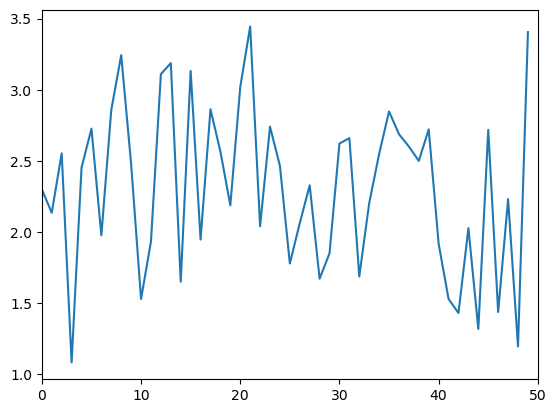

In [36]:
sa_result_QB_list  = []
sa = opt.SimulatedAnnealing(alpha=0.8,k_flip=4)
iter=50

for i in range(iter):
    sa.optimize(5000*Q,-1*beta_list,k=10)
    sa_result_QB_list += [bf.get_QB(sa.result,Q,-1*beta_list,0.5)]
    
    clear_output(wait=True)
    plt.xlim(0,iter)
    plt.plot(range(len(sa_result_QB_list)),sa_result_QB_list)
    plt.show()

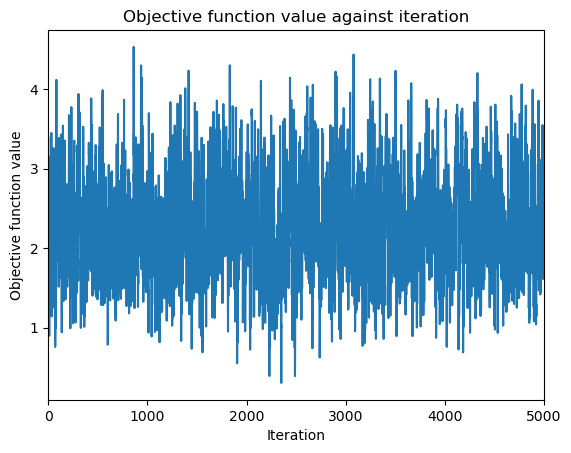

In [40]:
sa_result_QB_list  = []
sa = opt.SimulatedAnnealing(alpha=0.6,tau=0.8,k_flip=4)
iter=10

sa.optimize(Q,-1*beta_list,k=10)
opt_length = len(sa.theta_list)
for i in range(opt_length):
    sa_result_QB_list += [bf.get_QB(sa.theta_list[i],Q,-1*beta_list,0.5)]

plt.xlim(0,opt_length)
plt.plot(range(len(sa_result_QB_list)),sa_result_QB_list)
plt.title("Objective function value against iteration")
plt.xlabel("Iteration")
plt.ylabel("Objective function value")
plt.show()

In [51]:
from dimod import Integer,QuadraticModel,ConstrainedQuadraticModel

In [52]:
lamda = 0.5

In [53]:
beta = beta_list

In [42]:
p = len(Q)
integer_list = []
for i in range(p) :
    integer_list += [Integer(str("x")+str(i).zfill(3), upper_bound=1,lower_bound=0)]
linear_qubo = QuadraticModel()
for i in range(p): 
    linear_qubo += (1-lamda)*beta[i]*integer_list[i]    
quadratic_qubo = QuadraticModel()
for j in range(p):
    for i in range(p):
        quadratic_qubo += lamda*Q[i][j]*integer_list[i]*integer_list[j]

Qubo = linear_qubo + quadratic_qubo
cqm = ConstrainedQuadraticModel()
cqm.set_objective(Qubo)

cc = QuadraticModel()
for i in range(p):
    cc += integer_list[i]
cqm.add_constraint(cc==k)

cc = QuadraticModel()
for i in range(p):
    cc += integer_list[i]
cqm.add_constraint(cc==10)


NameError: name 'Integer' is not defined

In [55]:
cc

QuadraticModel({'x000': 1.0, 'x001': 1.0, 'x002': 1.0, 'x003': 1.0, 'x004': 1.0, 'x005': 1.0, 'x006': 1.0, 'x007': 1.0, 'x008': 1.0, 'x009': 1.0, 'x010': 1.0, 'x011': 1.0, 'x012': 1.0, 'x013': 1.0, 'x014': 1.0, 'x015': 1.0, 'x016': 1.0, 'x017': 1.0, 'x018': 1.0, 'x019': 1.0, 'x020': 1.0, 'x021': 1.0, 'x022': 1.0, 'x023': 1.0, 'x024': 1.0}, {}, 0.0, {'x000': 'INTEGER', 'x001': 'INTEGER', 'x002': 'INTEGER', 'x003': 'INTEGER', 'x004': 'INTEGER', 'x005': 'INTEGER', 'x006': 'INTEGER', 'x007': 'INTEGER', 'x008': 'INTEGER', 'x009': 'INTEGER', 'x010': 'INTEGER', 'x011': 'INTEGER', 'x012': 'INTEGER', 'x013': 'INTEGER', 'x014': 'INTEGER', 'x015': 'INTEGER', 'x016': 'INTEGER', 'x017': 'INTEGER', 'x018': 'INTEGER', 'x019': 'INTEGER', 'x020': 'INTEGER', 'x021': 'INTEGER', 'x022': 'INTEGER', 'x023': 'INTEGER', 'x024': 'INTEGER'}, dtype='float64')

In [ ]:
cc